In [31]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import altair as alt

In [32]:
ticker = "BBRI.JK"
data = yf.download(ticker, period="1d", interval="1m")

data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-08-26 09:00:00+07:00,5200.0,5225.0,5200.0,5200.0,5200.0,0
2024-08-26 09:01:00+07:00,5200.0,5225.0,5200.0,5225.0,5225.0,3072400
2024-08-26 09:02:00+07:00,5225.0,5225.0,5200.0,5225.0,5225.0,1916700
2024-08-26 09:03:00+07:00,5225.0,5225.0,5200.0,5200.0,5200.0,1440300
2024-08-26 09:04:00+07:00,5225.0,5225.0,5200.0,5225.0,5225.0,1108500


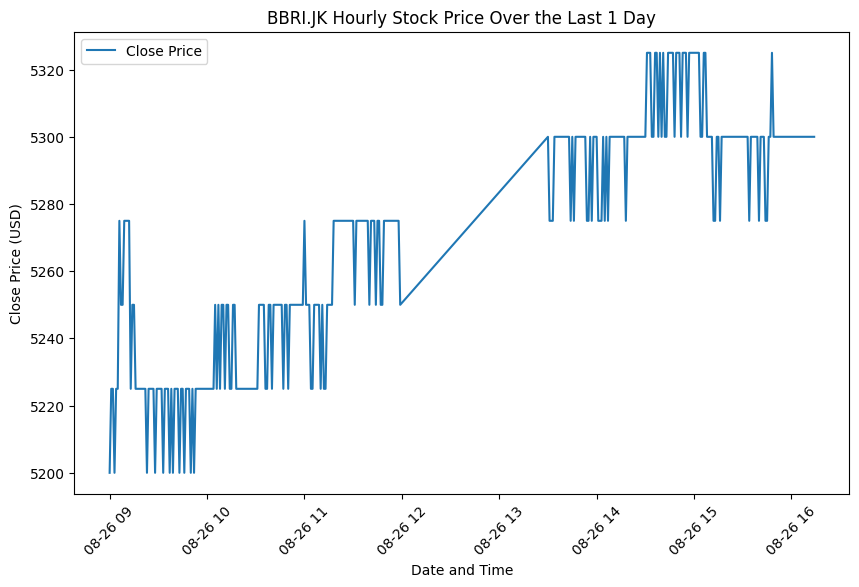

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Close Price')
plt.title(f"{ticker} Hourly Stock Price Over the Last 1 Day")
plt.xlabel("Date and Time")
plt.ylabel("Close Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [34]:
fig = go.Figure(data=[go.Candlestick(x=data.index,
                                     open=data['Open'],
                                     high=data['High'],
                                     low=data['Low'],
                                     close=data['Close'])])


fig.update_layout(title=f"{ticker} Hourly Candlestick Chart",
                  xaxis_title="Date and Time",
                  yaxis_title="Price (USD)",
                  xaxis_rangeslider_visible=False)

fig.show()

In [35]:
ticker = "BBRI.JK"
data = yf.download(ticker, period="1d", interval="1m")

data.reset_index(inplace=True)

data.head()

[*********************100%***********************]  1 of 1 completed


,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2024-08-26 09:00:00+07:00,5200.0,5225.0,5200.0,5200.0,5200.0,0
1,2024-08-26 09:01:00+07:00,5200.0,5225.0,5200.0,5225.0,5225.0,3072400
2,2024-08-26 09:02:00+07:00,5225.0,5225.0,5200.0,5225.0,5225.0,1916700
3,2024-08-26 09:03:00+07:00,5225.0,5225.0,5200.0,5200.0,5200.0,1440300
4,2024-08-26 09:04:00+07:00,5225.0,5225.0,5200.0,5225.0,5225.0,1108500


In [36]:
base = alt.Chart(data).encode(
    x=alt.X('Datetime:T', title='Date and Time', 
            scale=alt.Scale(domain=(data['Datetime'].min(), data['Datetime'].max())))
).interactive()


candlestick = base.mark_bar().encode(
    y=alt.Y('Open:Q', title='Price (USD)',
            scale=alt.Scale(domain=(data['Low'].min(), data['High'].max()))),
    y2='Close:Q',
    color=alt.condition("datum.Open <= datum.Close",
                        alt.value("#06982d"),
                        alt.value("#ae1325"))
).properties(title=f'{ticker} Hourly Candlestick Chart')


high_low = base.mark_rule().encode(
    y='Low:Q',
    y2='High:Q',
    color=alt.condition("datum.Open <= datum.Close",
                        alt.value("#06982d"),
                        alt.value("#ae1325")) 
)

chart = candlestick + high_low

chart

alt.LayerChart(...)